#An Analysis on COVID-19 in India

Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
%matplotlib inline

Read input files

In [ ]:
df = pd.read_csv('covid_19_india.csv')
df.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0  1.0  30/01/20  6:00 PM               Kerala                       1   
1  2.0  31/01/20  6:00 PM               Kerala                       1   
2  3.0  01/02/20  6:00 PM               Kerala                       2   
3  4.0  02/02/20  6:00 PM               Kerala                       3   
4  5.0  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0

check the columns that we have in the data

In [ ]:
df.columns



Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

check the shape of the dataframe

In [ ]:
df.shape

(806, 9)

check if the data has any null values

In [ ]:
df.isna().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     5
ConfirmedForeignNational    5
Cured                       5
Deaths                      5
Confirmed                   5
dtype: int64

check the data types

In [ ]:
df.dtypes

Sno                         float64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational      object
ConfirmedForeignNational     object
Cured                       float64
Deaths                      float64
Confirmed                   float64
dtype: object

To see the last few values in the dataframe

In [ ]:
df.tail()

Sno Date Time State/UnionTerritory ConfirmedIndianNational  \
801  NaN  NaN  NaN                  NaN                     NaN   
802  NaN  NaN  NaN                  NaN                     NaN   
803  NaN  NaN  NaN                  NaN                     NaN   
804  NaN  NaN  NaN                  NaN                     NaN   
805  NaN  NaN  NaN                  NaN                     NaN   

    ConfirmedForeignNational  Cured  Deaths  Confirmed  
801                      NaN    NaN     NaN        NaN  
802                      NaN    NaN     NaN        NaN  
803                      NaN    NaN     NaN        NaN  
804                      NaN    NaN     NaN        NaN  
805                      NaN    NaN     NaN        NaN

Check the values for the columns ‘’ConfirmedIndianNational’ and ‘ConfirmedForeignNational’

In [ ]:
df['ConfirmedIndianNational'].value_counts()

-      355
1      108
3       73
2       33
4       21
      ... 
41       1
86       1
87       1
45       1
110      1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [ ]:
df['ConfirmedForeignNational'].value_counts()

-     355
0     314
1      39
2      36
14     25
3      12
10      6
8       5
7       3
6       3
11      2
9       1
Name: ConfirmedForeignNational, dtype: int64

Most of the rows for the above column have null values, hence we can drop this column.

Sno and Time can be dropped as well as it does not have any relevant information.

In [ ]:
df = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational', 'Sno', 'Time'], axis = 1)

In [ ]:
df.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0  30/01/20               Kerala    0.0     0.0        1.0
1  31/01/20               Kerala    0.0     0.0        1.0
2  01/02/20               Kerala    0.0     0.0        2.0
3  02/02/20               Kerala    0.0     0.0        3.0
4  03/02/20               Kerala    0.0     0.0        3.0

Check states for which the dataframe contains the information

In [ ]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', nan], dtype=object)

Rename the column State/UnionTerritory for easy reference.

In [ ]:
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)
df['States'] = df['States'].replace(['Maharashtra'],'MH')
df['States'] = df['States'].replace(['Kerala'],'KL')
df['States'] = df['States'].replace(['Karnataka'],'KA')
df['States'] = df['States'].replace(['Tamil Nadu'],'TN')
df['States'] = df['States'].replace(['Andhra Pradesh'],'AP')
df['States'] = df['States'].replace(['Uttar Pradesh'],'UP')
df['States'] = df['States'].replace(['Madhya Pradesh'],'MP')
df['States'] = df['States'].replace(['Karanataka'],'KA')
df['States'] = df['States'].replace(['West Bengal'],'WB')
df['tates'] = df['States'].replace(['Himachal Pradesh'],'HP')
df['States'] = df['States'].replace(['Jammu and Kashmir'],'JNK')
df['States'].unique()

array(['KL', 'Telengana', 'Delhi', 'Rajasthan', 'UP', 'Haryana', 'Ladakh',
       'TN', 'KA', 'MH', 'Punjab', 'JNK', 'AP', 'Uttarakhand', 'Odisha',
       'Puducherry', 'WB', 'Chhattisgarh', 'Chandigarh', 'Gujarat',
       'Himachal Pradesh', 'MP', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam',
       'Jharkhand', 'Arunachal Pradesh', 'Tripura', nan], dtype=object)

Find out the maximum cases until 27th March 2020 for each state.

In [ ]:
df_latest = df[df['Date']=="27/03/20"]

df_latest.head()

Date                       States  Cured  Deaths  Confirmed  \
392  27/03/20  Andaman and Nicobar Islands    0.0     0.0        1.0   
393  27/03/20                           AP    1.0     0.0       12.0   
394  27/03/20                        Bihar    0.0     1.0        6.0   
395  27/03/20                   Chandigarh    0.0     0.0        7.0   
396  27/03/20                 Chhattisgarh    0.0     0.0        6.0   

                           tates  
392  Andaman and Nicobar Islands  
393                           AP  
394                        Bihar  
395                   Chandigarh  
396                 Chhattisgarh

Find out the total confirmed cases till 27th March 2020

In [ ]:
df_latest['Confirmed'].sum()

724.0

Find out the percentage for Active, fatal and cured cases

In [ ]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

df['%Cured']=(df['Cured']/df['Confirmed'])*100

df['%Deaths']=(df['Deaths']/df['Confirmed'])*100

df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)

df_latest.head(10)

Date     States  Cured  Deaths  Confirmed      tates
404  27/03/20         KL   11.0     0.0      137.0         KL
407  27/03/20         MH   15.0     4.0      130.0         MH
403  27/03/20         KA    3.0     2.0       55.0         KA
415  27/03/20  Telengana    1.0     0.0       45.0  Telengana
399  27/03/20    Gujarat    0.0     3.0       43.0    Gujarat
417  27/03/20         UP   11.0     0.0       41.0         UP
413  27/03/20  Rajasthan    3.0     0.0       41.0  Rajasthan
397  27/03/20      Delhi    6.0     1.0       36.0      Delhi
412  27/03/20     Punjab    0.0     1.0       33.0     Punjab
400  27/03/20    Haryana   11.0     0.0       30.0    Haryana

Check the data for the 10 most affected states with covid-19 in India

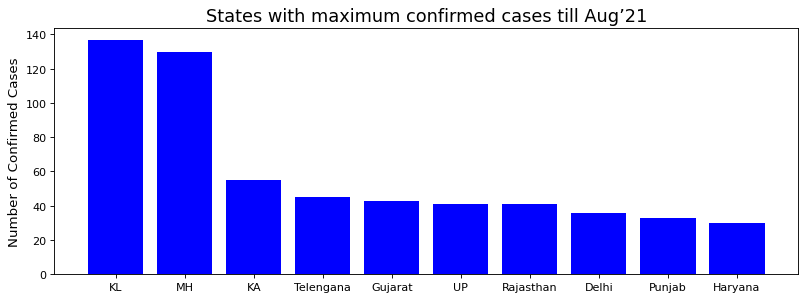

In [ ]:
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)

plt.figure(figsize=(12,4), dpi=80)

plt.bar(df_latest['States'][:10], df_latest['Confirmed'][:10],align='center',color='blue')

plt.ylabel('Number of Confirmed Cases', size = 12)

plt.title("States with maximum confirmed cases till Aug’21", size = 16)

plt.show()

Top 10 States with Maximum Cases

In [ ]:
df2= df_latest.copy()

df_Top= df2.head(10)

df_Top.style.background_gradient(cmap='Reds')

Check the data statewise

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

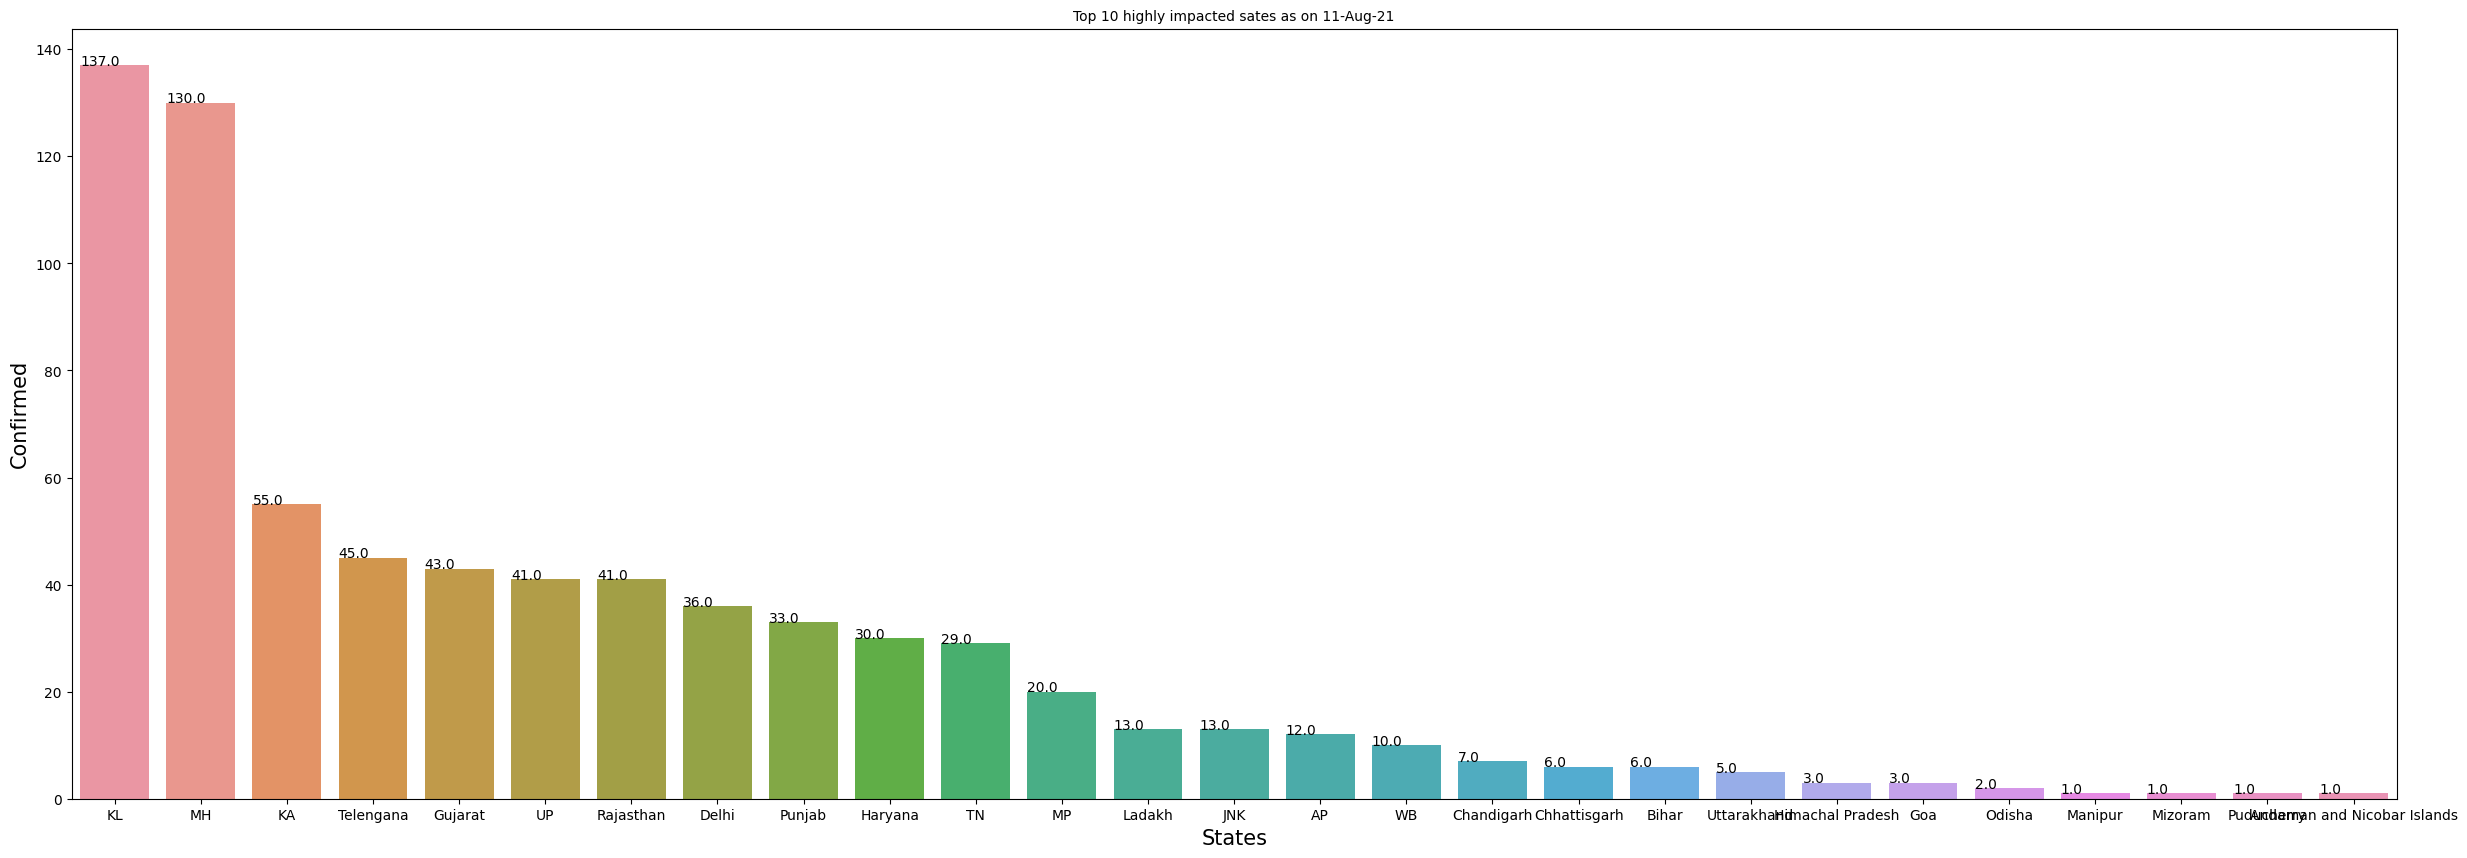

In [ ]:
df2 = df2.sort_values(by=['Confirmed'], ascending = False)
for feature in df2[['Cured','Deaths','Confirmed']]:

  fig=plt.figure(figsize=(30,10))

plt.title("Top 10 highly impacted sates as on 11-Aug-21", size=10)
ax=sns.barplot(data=df2,y=df2[feature],x='States', linewidth=0, edgecolor='black')
plt.xlabel('States', size = 15)
plt.ylabel(feature, size = 15)
for i in ax.patches:

  ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

plt.show()



**Find out the total death till Aug 2021**

In [ ]:
df_latest['Deaths'].sum()

17.0

**The beow graph shows rise in total cases per day**

<Axes: xlabel='Date', ylabel='Confirmed'>

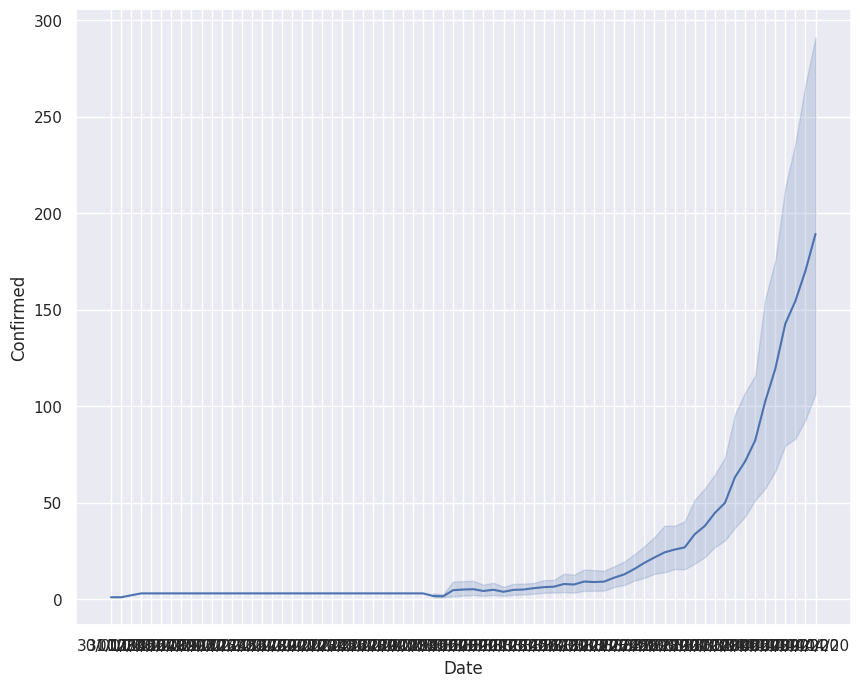

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})

sns.lineplot(x='Date', y='Confirmed', data=df)

Comparison of the Active, Cured and Confirmed cases for the Top States

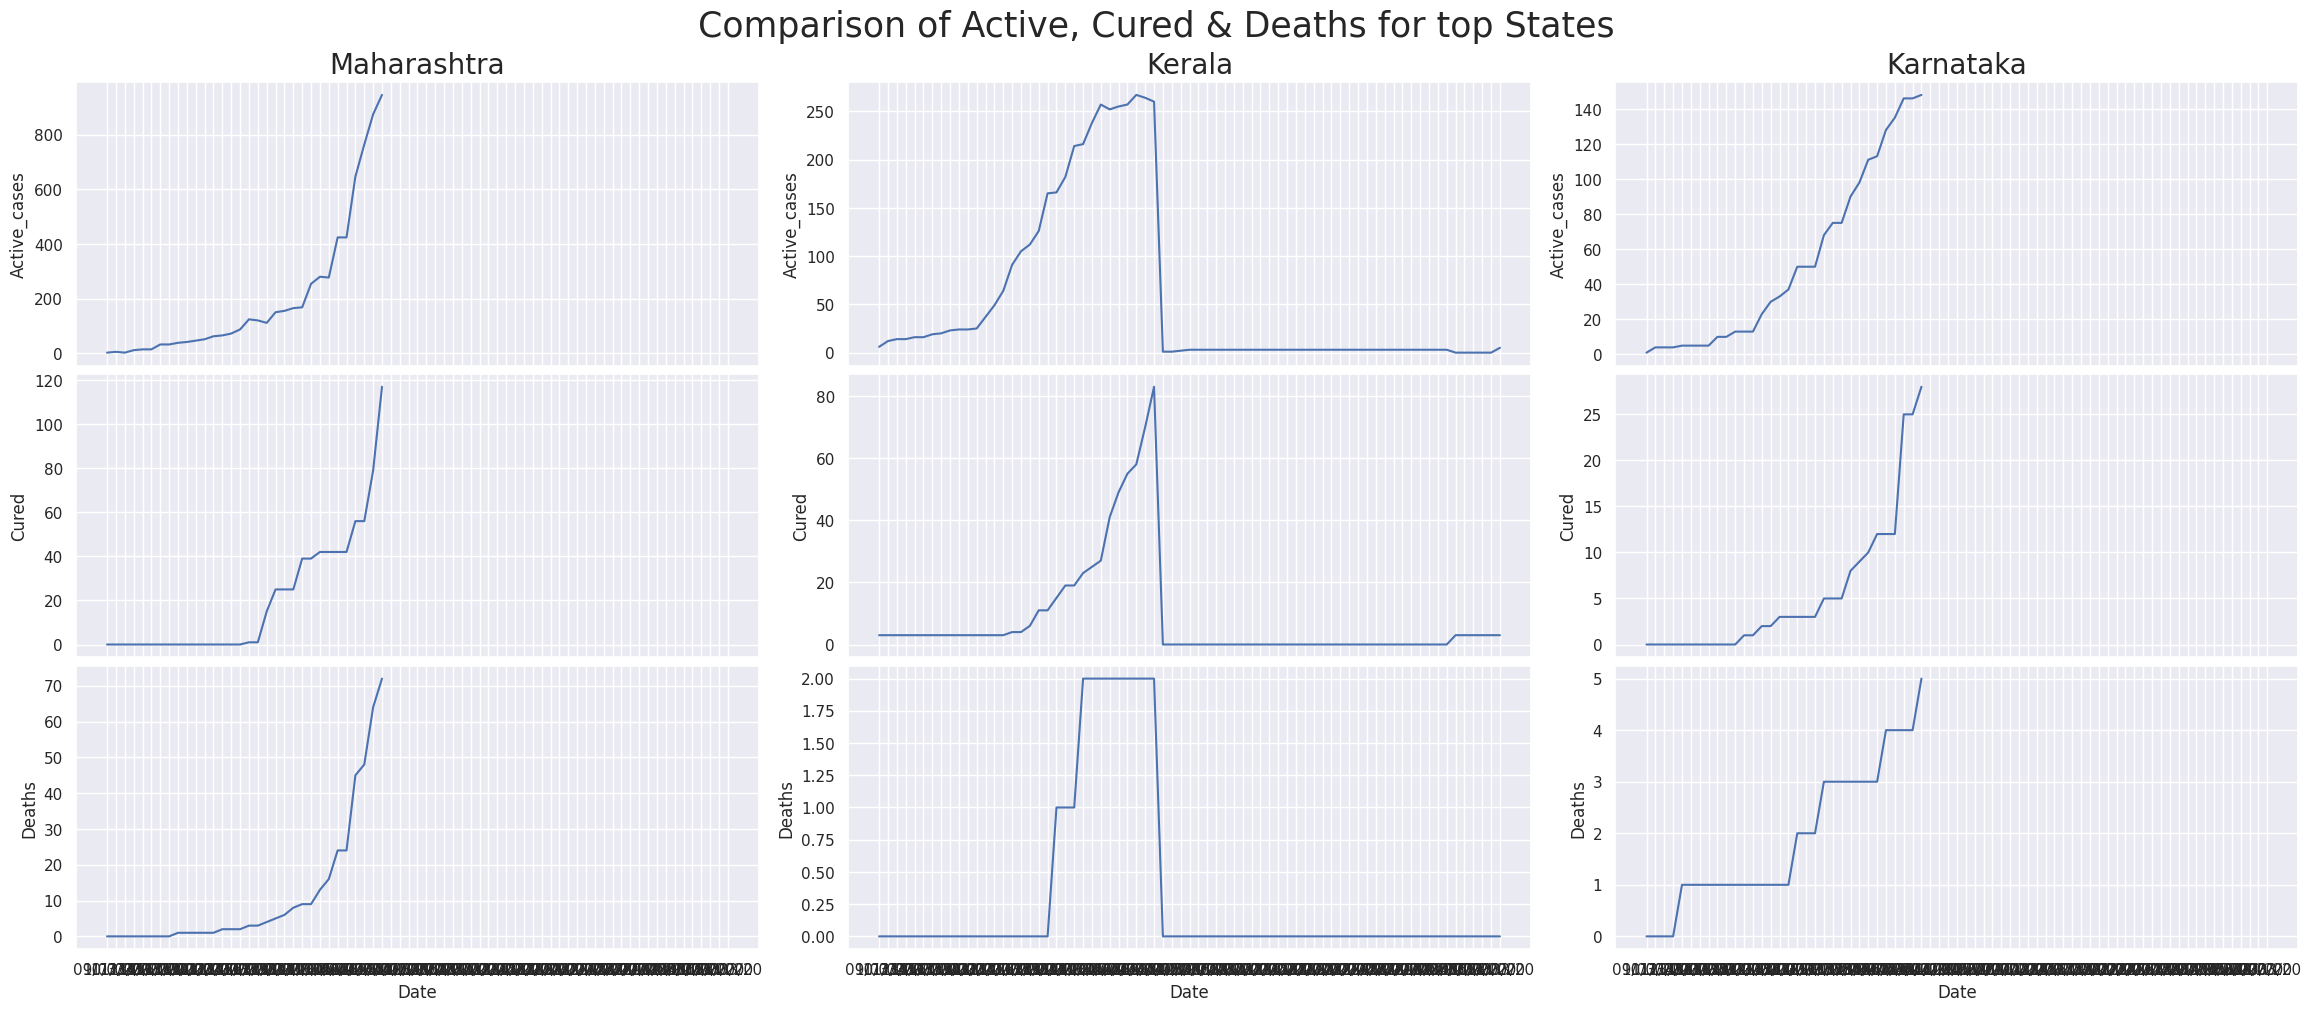

In [ ]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Uttar Pradesh', 'Madhya Pradesh',
        'West Bengal' ]

MH=df[df['States']=='MH']
KL=df[df['States']=='KL']
KR=df[df['States']=='KA']
TN=df[df['States']=='TN']
AP=df[df['States']=='AP']
UP=df[df['States']=='UP']
WB=df[df['States']=='WB']
Delhi=df[df['States']=='Delhi']
Chhattisgarh=df[df['States']=='Chhattisgarh']
Odisha=df[df['States']=='Odisha']
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False,
                                              constrained_layout=True )

plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=MH, x='Date',y='Active_cases', ax=ax[0,0], color='b')
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=MH, x='Date',y='Cured', ax=ax[1,0], color='b')
sns.lineplot(data=MH, x='Date',y='Deaths', ax=ax[2,0], color='b')

sns.lineplot(data=KL, x='Date',y='Active_cases', ax=ax[0,1], color='b')
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=KL, x='Date',y='Cured', ax=ax[1,1], color='b')
sns.lineplot(data=KL, x='Date',y='Deaths', ax=ax[2,1], color='b')

sns.lineplot(data=KR, x='Date',y='Active_cases', ax=ax[0,2], color='b')
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=KR, x='Date',y='Cured', ax=ax[1,2], color='b')
sns.lineplot(data=KR, x='Date',y='Deaths', ax=ax[2,2], color='b')
plt.show()

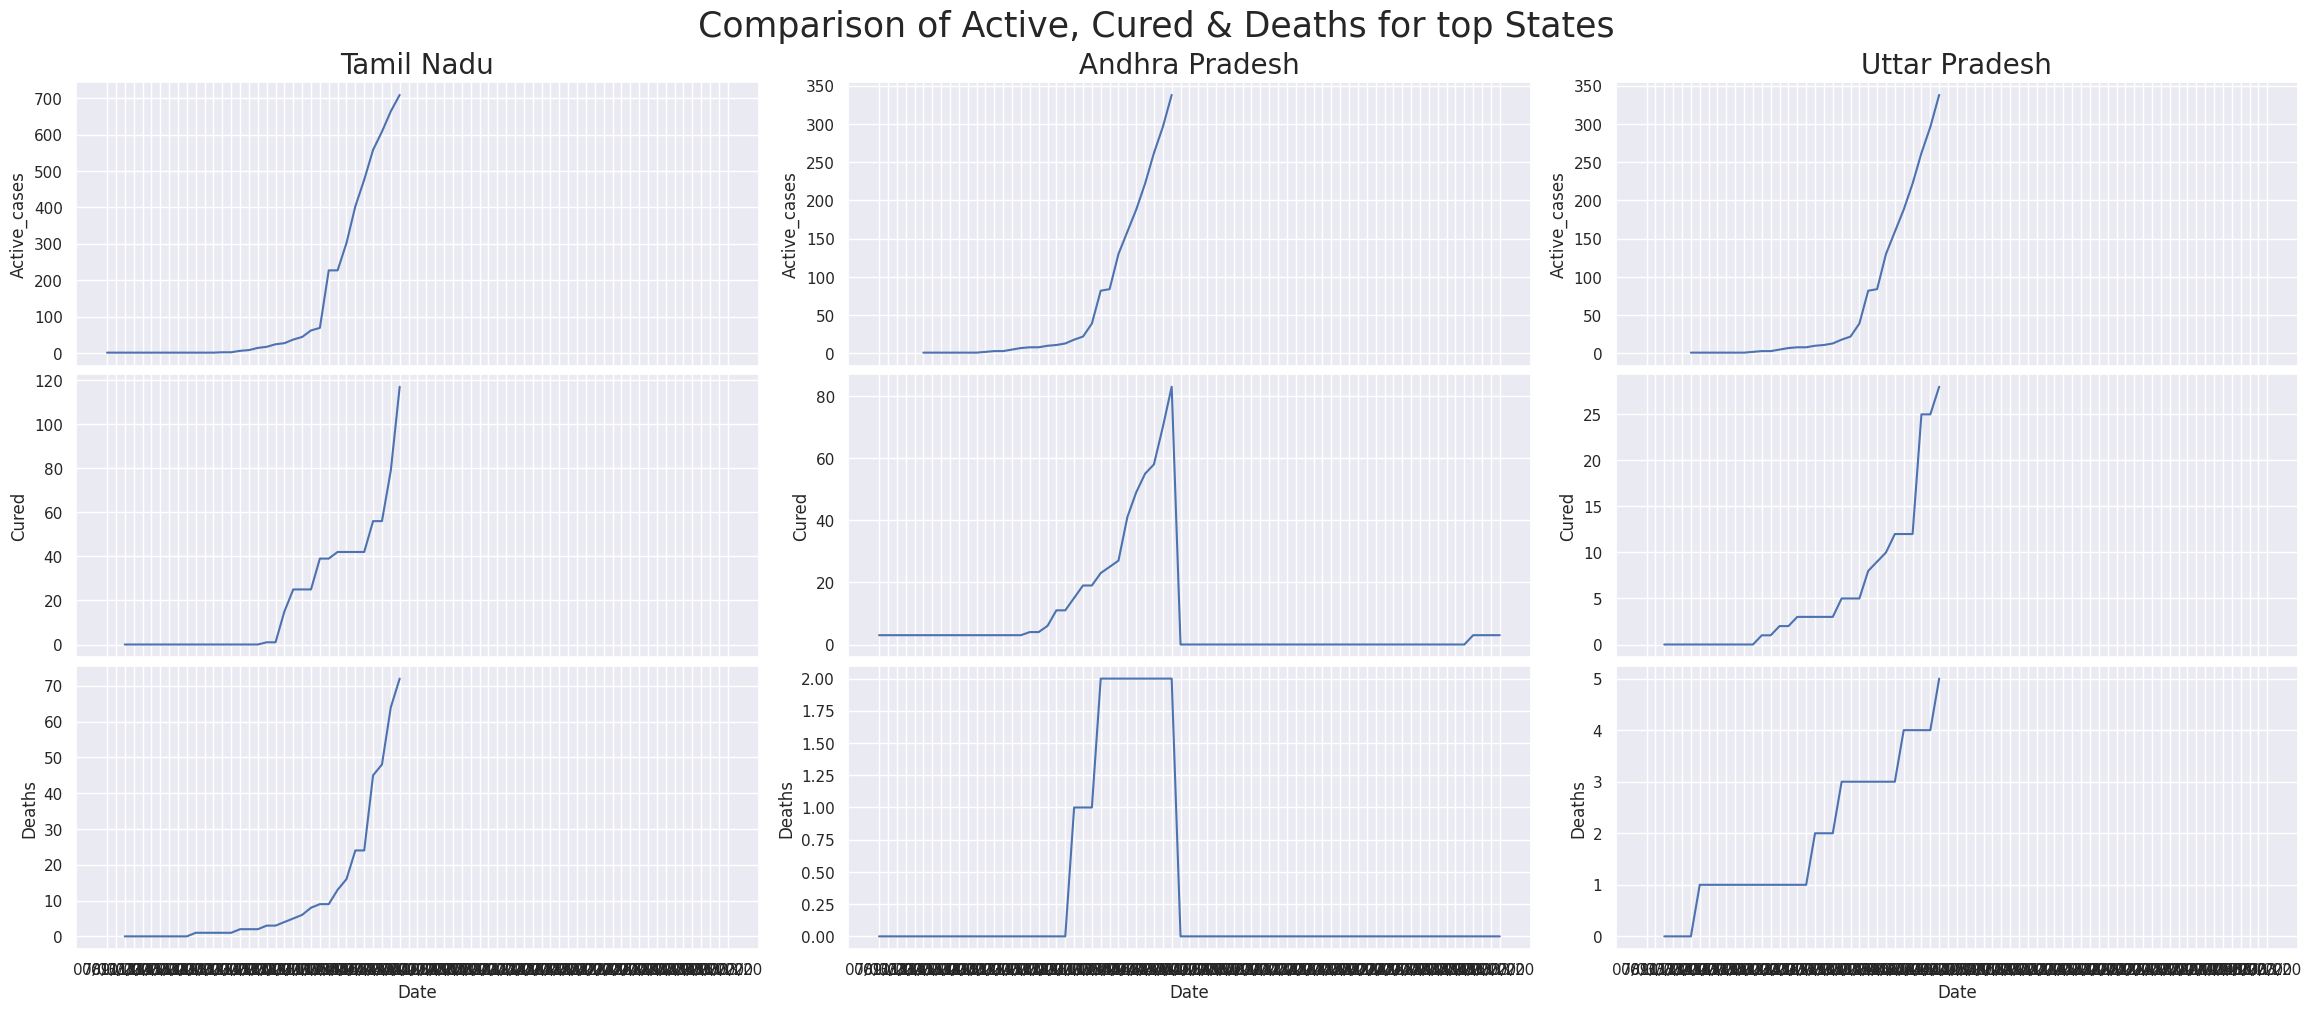

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )

plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)

sns.lineplot(data=TN, x='Date',y='Active_cases', ax=ax[0,0], color='b')

ax[0,0].set_title('Tamil Nadu', size=20)

sns.lineplot(data=MH, x='Date',y='Cured', ax=ax[1,0], color='b')

sns.lineplot(data=MH, x='Date',y='Deaths', ax=ax[2,0], color='b')

sns.lineplot(data=AP, x='Date',y='Active_cases', ax=ax[0,1], color='b')

ax[0,1].set_title("Andhra Pradesh", size=20)

sns.lineplot(data=KL, x='Date',y='Cured', ax=ax[1,1], color='b')

sns.lineplot(data=KL, x='Date',y='Deaths', ax=ax[2,1], color='b')

sns.lineplot(data=AP, x='Date',y='Active_cases', ax=ax[0,2], color='b')

ax[0,2].set_title("Uttar Pradesh", size=20)

sns.lineplot(data=KR, x='Date',y='Cured', ax=ax[1,2], color='b')

sns.lineplot(data=KR, x='Date',y='Deaths', ax=ax[2,2], color='b')

plt.show()

In [ ]:
df_latest.shape

(27, 6)

Divide the data into the year 2020 and 2021 to find the monthwise trend in regards to active cases, recovery rate and fatality

In [ ]:
df['Date']= pd.to_datetime(df['Date']) # Date is converted to DateTime format.

data_20 = df[df['Date'].dt.year==2020] # Considering data of only the year 2020.

data_21 = df[df['Date'].dt.year==2021] # Considering data of only the year 2021.

data_20['Month']=data_20['Date'].dt.month # Month is accessed from the DateTime object.

data_21['Month']=data_21['Date'].dt.month

<ipython-input-28-f070b5c2d73c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20['Month']=data_20['Date'].dt.month # Month is accessed from the DateTime object.


**Year 2020**

In [ ]:
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()

data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum() # creating instances for 'confirmed','deaths','discharged' by month column

data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

**Year 2021**

In [ ]:
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()

data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum() # creating instances for ‘confirmed’,’deaths’,’discharged’ by month column

data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]

data_20=pd.concat(cols_20,axis=1)

cols_21=[data_confirm_21,data_dis_21,data_death_21]

data_21=pd.concat(cols_21,axis=1)

**Year 2020**

In [ ]:
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4) # create instances for ‘death_rate and discharge_rate’

data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

**Year 2020**

In [ ]:
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4) # create instances for ‘death_rate and discharge_rate’

data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

**Year 2020**

In [ ]:
data_20.reset_index(inplace=True)

data_20.head()

Month  Confirmed  Cured  Deaths  discharge_rate_20  death_rate_20
0      1     1841.0  144.0    41.0             7.8218         2.2271
1      2     2128.0  156.0    53.0             7.3308         2.4906
2      3    11829.0  944.0   264.0             7.9804         2.2318
3      4     3103.0  216.0    75.0             6.9610         2.4170
4      5     3610.0  278.0    83.0             7.7008         2.2992

**The recovery rate was much higher in the year 2020. This could be attributed to the complete lockdown and telling people were more precautious**

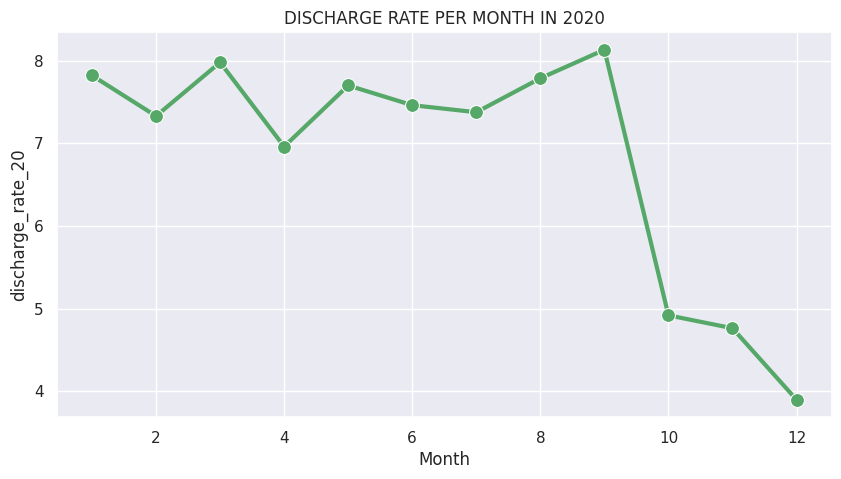

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)

plt.title('DISCHARGE RATE PER MONTH IN 2020')

plt.show()